<a href="https://colab.research.google.com/github/guiebitt/cddeeplearning/blob/master/exercicio07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 07: Classificação de roupas

# Etapa 01: Importação das bibliotecas

In [4]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__


'2.5.0'

# Etapa 02: Carregamento de dados

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
fashion_train_df = pd.read_csv('/content/drive/My Drive/Deise & Guilherme/Pós Graduação/Guilherme/Ciências de Dados/11 - Deep Learning/Classificação de Roupas/fashion-mnist-train.csv')
fashion_test_df = pd.read_csv('/content/drive/My Drive/Deise & Guilherme/Pós Graduação/Guilherme/Ciências de Dados/11 - Deep Learning/Classificação de Roupas/fashion-mnist-test.csv')

# Etapa 03: Visualização de dados

In [7]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_train_df.shape

(60000, 785)

In [10]:
fashion_test_df.shape

(10000, 785)

In [11]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

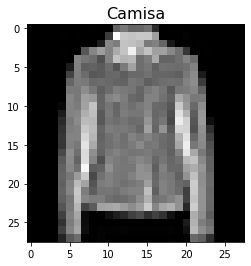

In [12]:
i = random.randint(1, 60000);
plt.imshow(training[i,1:].reshape((28, 28)), cmap = "gray");
labels = ['Camiseta', 'Calça', 'Sueter', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota'];
label = labels[int(training[i, 0])];
plt.title(label, fontdict={'fontsize': 16});

In [13]:
# 0 -> Camiseta
# 1 -> Calça
# 2 -> Sueter
# 3 -> Vestido
# 4 -> Casaco
# 5 -> Sandália
# 6 -> Camisa
# 7 -> Tênis
# 8 -> Bolsa
# 9 -> Bota

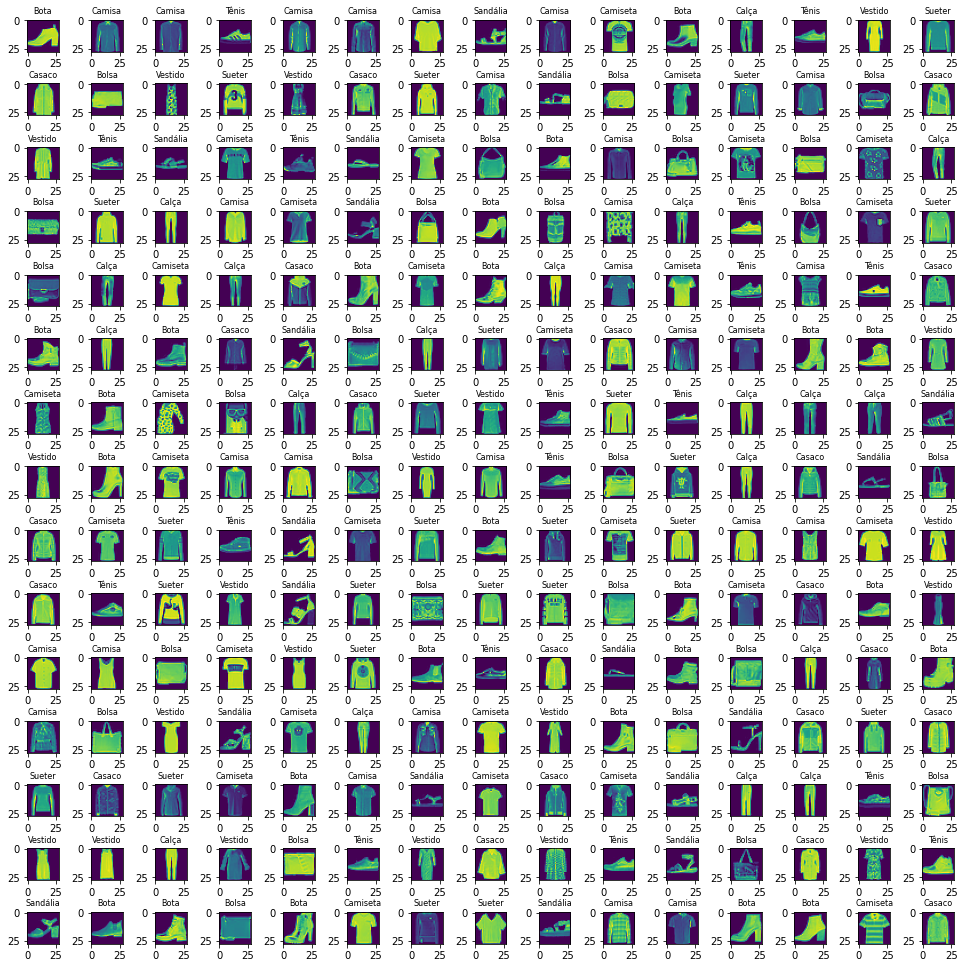

In [14]:
w_grid = 15
l_grid = 15

# Cria uma matriz 15 por 15 com quadrados 17px por 17px
fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

# Percorre cada quadrado:
for i in np.arange(0, w_grid * l_grid):
  # Pega um índice aleatório dos dados de treinamento
  index = np.random.randint(0, n_training)
  # Define a imagem para o quadrado
  axes[i].imshow(training[index, 1:].reshape((28,28)))
  # Define o título para o quadrado
  axes[i].set_title(labels[int(training[index, 0])], fontsize = 8)

# Ajusta as linhas para dar um espaçamento entre linhas
plt.subplots_adjust(hspace = 1.0)

# Etapa 04: Tratamento de dados

In [15]:
# Geralmente normalizamos os dados de entrada
x_train = training[:,1:] / 255

# A normalização do output ocorre apenas se os dados forem muitos discrepantes,
# neste caso temos os valores de 0 até 9
y_train = training[:,0]

In [16]:
x_test = testing[:,1:] / 255
y_test = testing[:,0]

In [17]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
x_test.shape

(10000, 28, 28, 1)

# Etapa 05: Construção e treinamento do modelo

In [22]:
from tensorflow.keras import layers, models

In [23]:
cnn = models.Sequential()

# Adiciona camada convolucional com o input dos dados e 32 filtros
cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
# Adiciona uma camada de pooling
cnn.add(layers.MaxPooling2D(2,2))

# Adiciona mais uma camada convolucional com 64 filtros
# Geralmente aumentamos a quantidade de filtros conforme as camadas que vamos
# adicionando, entendendo que o processo de aprendizado vai ocorrendo de forma
# gradativa
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# Adiciona mais uma camada de pooling
cnn.add(layers.MaxPooling2D(2,2))

# Adiciona mais uma camada convolucional com 64 filtros
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# Adiciona mais uma camada de pooling
cnn.add(layers.MaxPooling2D(2,2))

# Adiciona uma camada flatten 
cnn.add(layers.Flatten())

# Adiciona uma camada dense
cnn.add(layers.Dense(64, activation = 'relu'))

# Adiciona mais uma camada dense
cnn.add(layers.Dense(64, activation = 'relu'))

# Adiciona uma camada softmax (adequada para nosso retorno da probabilidade das
# 10 categorias)
# https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax
cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [24]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [25]:
epochs_hist = cnn.fit(x_train, y_train, batch_size = 512, epochs = 200)

Epoch 1/200
118/118 [==============================] - 33s 12ms/step - loss: 1.0746 - accuracy: 0.6081
Epoch 2/200
118/118 [==============================] - 1s 11ms/step - loss: 0.6267 - accuracy: 0.7690
Epoch 3/200
118/118 [==============================] - 1s 11ms/step - loss: 0.5392 - accuracy: 0.8044
Epoch 4/200
118/118 [==============================] - 1s 11ms/step - loss: 0.4889 - accuracy: 0.8232
Epoch 5/200
118/118 [==============================] - 1s 11ms/step - loss: 0.4580 - accuracy: 0.8342
Epoch 6/200
118/118 [==============================] - 1s 11ms/step - loss: 0.4258 - accuracy: 0.8464
Epoch 7/200
118/118 [==============================] - 1s 11ms/step - loss: 0.4049 - accuracy: 0.8542
Epoch 8/200
118/118 [==============================] - 1s 11ms/step - loss: 0.3849 - accuracy: 0.8616
Epoch 9/200
118/118 [==============================] - 1s 11ms/step - loss: 0.3663 - accuracy: 0.8681
Epoch 10/200
118/118 [==============================] - 1s 11ms/step - loss: 0.35

In [26]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

# Etapa 06: Avaliação do modelo

In [27]:
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9521 - accuracy: 0.8991


In [28]:
prediction_classes = cnn.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
prediction_classes

array([0, 1, 2, ..., 8, 8, 1])

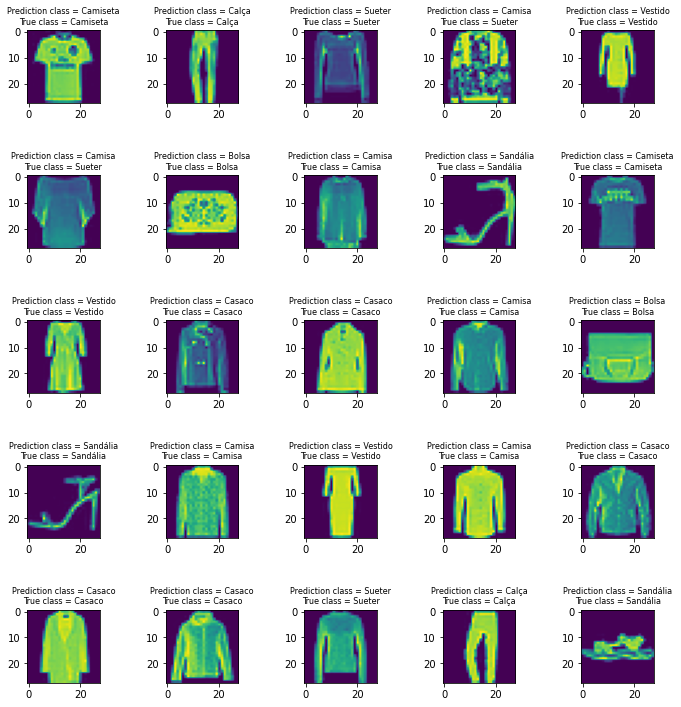

In [30]:
w_grid = 5
l_grid = 5

# Cria uma matriz 15 por 15 com quadrados 12px por 12px
fig, axes = plt.subplots(l_grid, w_grid, figsize = (12,12))
axes = axes.ravel()
n_training = len(training)

# Percorre cada quadrado:
for i in np.arange(0, w_grid * l_grid):
  # Define a imagem para o quadrado
  axes[i].imshow(x_test[i].reshape((28,28)))
  # Define o título para o quadrado
  axes[i].set_title('Prediction class = {}\nTrue class = {}'.format(labels[int(prediction_classes[i])], labels[int(y_test[i])]), fontsize = 8)

# Ajusta as linhas para dar um espaçamento entre linhas
plt.subplots_adjust(hspace = 1.0)

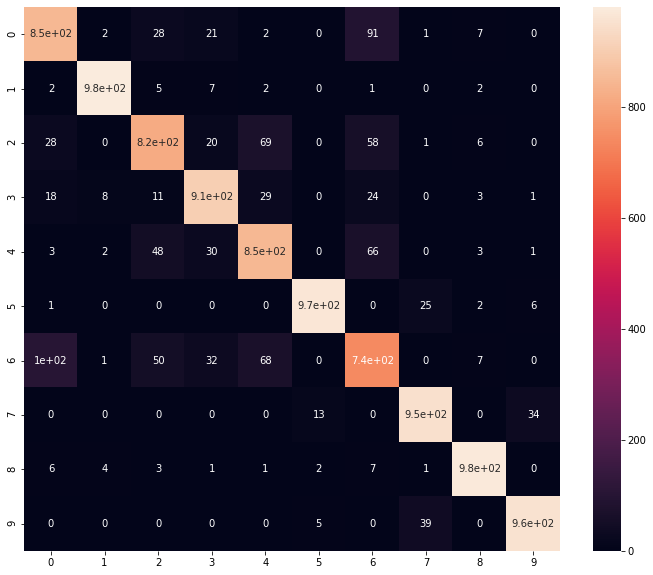

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_classes)
plt.figure(figsize = (12,10))
sns.heatmap(cm, annot = True)

In [32]:
cm

array([[848,   2,  28,  21,   2,   0,  91,   1,   7,   0],
       [  2, 981,   5,   7,   2,   0,   1,   0,   2,   0],
       [ 28,   0, 818,  20,  69,   0,  58,   1,   6,   0],
       [ 18,   8,  11, 906,  29,   0,  24,   0,   3,   1],
       [  3,   2,  48,  30, 847,   0,  66,   0,   3,   1],
       [  1,   0,   0,   0,   0, 966,   0,  25,   2,   6],
       [101,   1,  50,  32,  68,   0, 741,   0,   7,   0],
       [  0,   0,   0,   0,   0,  13,   0, 953,   0,  34],
       [  6,   4,   3,   1,   1,   2,   7,   1, 975,   0],
       [  0,   0,   0,   0,   0,   5,   0,  39,   0, 956]])

In [33]:
from sklearn.metrics import classification_report
num_class = 10
target_names = ['Class {}'.format(labels[i]) for i in range(num_class)]

In [34]:
target_names

['Class Camiseta',
 'Class Calça',
 'Class Sueter',
 'Class Vestido',
 'Class Casaco',
 'Class Sandália',
 'Class Camisa',
 'Class Tênis',
 'Class Bolsa',
 'Class Bota']

In [35]:
# Avalia o grau de precisão do nosso modelo
print(classification_report(y_test, prediction_classes, target_names = labels ))

              precision    recall  f1-score   support

    Camiseta       0.84      0.85      0.85      1000
       Calça       0.98      0.98      0.98      1000
      Sueter       0.85      0.82      0.83      1000
     Vestido       0.89      0.91      0.90      1000
      Casaco       0.83      0.85      0.84      1000
    Sandália       0.98      0.97      0.97      1000
      Camisa       0.75      0.74      0.75      1000
       Tênis       0.93      0.95      0.94      1000
       Bolsa       0.97      0.97      0.97      1000
        Bota       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

